In [1]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

dataset = pd.read_csv('income.csv')
print(dataset)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

<Axes: title={'center': 'Objects in workclass'}, xlabel='objects', ylabel='count'>

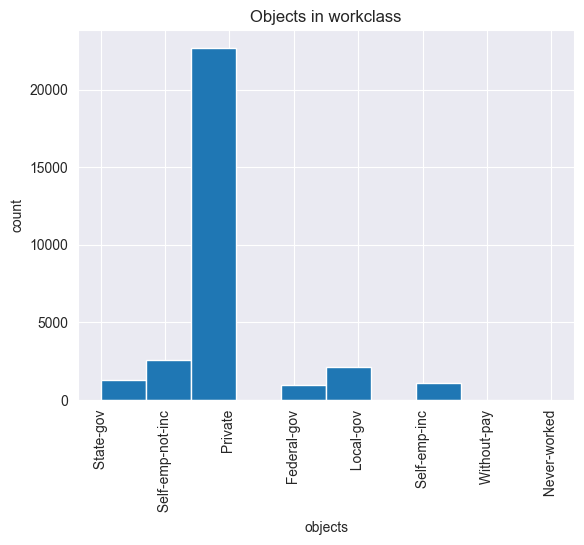

In [2]:
dataset.replace(' ?', np.NaN, inplace=True)
plt.xticks(rotation=90)
plt.title('Objects in workclass')
plt.ylabel('count')
plt.xlabel('objects')
dataset['workclass'].hist()

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

Learning rate set to 0.5
0:	learn: 0.4900796	total: 59.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4900796	total: 2.22ms	remaining: 2.22ms
1:	learn: 0.4116364	total: 3.62ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4900796	total: 1.44ms	remaining: 2.89ms
1:	learn: 0.4116364	total: 3.6ms	remaining: 1.8ms
2:	learn: 0.3721631	total: 5.24ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4900796	total: 1.9ms	remaining: 5.69ms
1:	learn: 0.4116364	total: 3.05ms	remaining: 3.05ms
2:	learn: 0.3721631	total: 4.46ms	remaining: 1.49ms
3:	learn: 0.3476061	total: 5.65ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4900796	total: 1.2ms	remaining: 4.79ms
1:	learn: 0.4116364	total: 2.43ms	remaining: 3.65ms
2:	learn: 0.3721631	total: 3.51ms	remaining: 2.34ms
3:	learn: 0.3476061	total: 4.57ms	remaining: 1.14ms
4:	learn: 0.3325591	total: 5.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4900796	total: 1.1ms	remaining: 5.5ms
1:	learn: 0.4116364	total: 2.19ms	remain

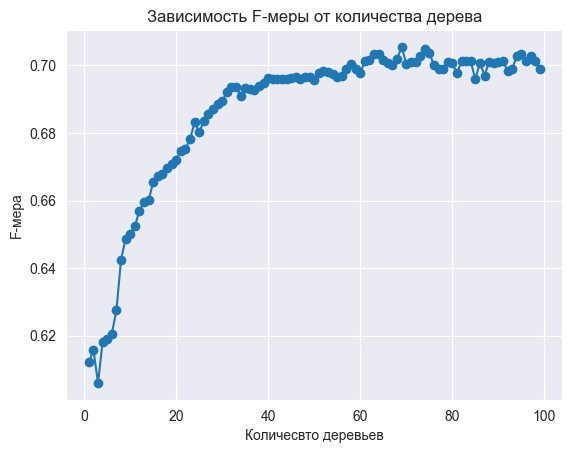

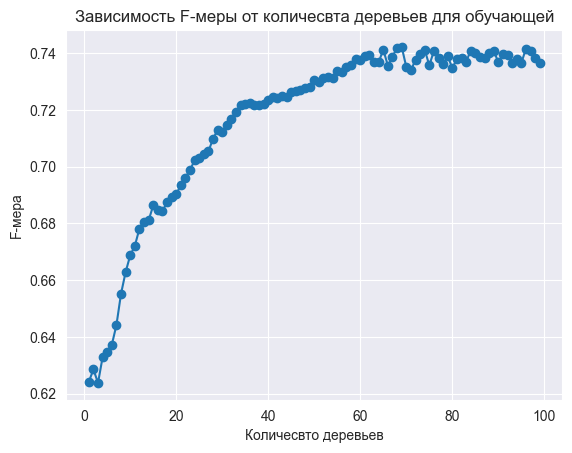

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('income', axis=1), dataset['income'], test_size=0.3, random_state=10)

trees = range(1, 100)
f1_scores = []
f1_train_scores = []

for tree in trees:
    model = CatBoostClassifier(n_estimators=tree, random_state=10)
    
    model.fit(X_train, y_train)
    
    y_tr = model.predict(X_train)
    y_pred = model.predict(X_test)
    f1_train = f1_score(y_train, y_tr)
    f1 = f1_score(y_test, y_pred)
    f1_train_scores.append(f1_train)
    f1_scores.append(f1)

plt.plot(trees, f1_scores, marker='o')
plt.xlabel('Количесвто деревьев')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от количества дерева')
plt.grid(True)
plt.show()

plt.plot(trees, f1_train_scores, marker='o')
plt.xlabel('Количесвто деревьев')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от количесвта деревьев для обучающей')
plt.grid(True)
plt.show()

In [5]:
model = CatBoostClassifier(n_estimators=68, random_state=10)
    
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test, y_pred)

pd.DataFrame(data=confusion_matrix_result, columns=['predicate <=50', 'predicate >50'], index=['actual <=50', 'actual >50']).head()

Learning rate set to 0.460571
0:	learn: 0.5016930	total: 5.16ms	remaining: 346ms
1:	learn: 0.4219746	total: 19.2ms	remaining: 633ms
2:	learn: 0.3813741	total: 22.3ms	remaining: 483ms
3:	learn: 0.3543475	total: 25.1ms	remaining: 402ms
4:	learn: 0.3395242	total: 27.4ms	remaining: 346ms
5:	learn: 0.3282656	total: 32.2ms	remaining: 332ms
6:	learn: 0.3196320	total: 36.7ms	remaining: 320ms
7:	learn: 0.3127145	total: 41ms	remaining: 308ms
8:	learn: 0.3085722	total: 45.1ms	remaining: 296ms
9:	learn: 0.3049267	total: 48.9ms	remaining: 284ms
10:	learn: 0.3025231	total: 51.3ms	remaining: 266ms
11:	learn: 0.2998921	total: 53.6ms	remaining: 250ms
12:	learn: 0.2986115	total: 55.9ms	remaining: 236ms
13:	learn: 0.2971043	total: 58.4ms	remaining: 225ms
14:	learn: 0.2954714	total: 62.6ms	remaining: 221ms
15:	learn: 0.2928652	total: 67.5ms	remaining: 219ms
16:	learn: 0.2912927	total: 70.8ms	remaining: 212ms
17:	learn: 0.2903790	total: 73.4ms	remaining: 204ms
18:	learn: 0.2889700	total: 75.8ms	remaining: 

,predicate <=50,predicate >50
actual <=50,6975,448
actual >50,835,1511
